# 🛒 Customer Segmentation for E-Commerce: RFM, Cohort Analysis & K-Means  

## 📌 Project Overview  
This project focuses on **customer segmentation** for a Brazilian e-commerce platform using **RFM analysis, cohort analysis, and K-Means clustering**. By analyzing historical customer transactions, we aim to uncover key purchasing behaviors and segment customers into meaningful groups for better business decision-making.  

## 🎯 Goals  
✔ Identify customer purchasing patterns using **RFM Analysis**  
✔ Analyze customer retention trends using **Cohort Analysis**  
✔ Apply **K-Means Clustering** for data-driven segmentation  
✔ Provide actionable insights for marketing strategies  

## 🔍 Dataset Information  
We will be using the **Olist Brazilian E-Commerce Dataset**, which contains various CSV files related to **orders, customers, payments, and items**.  

## 🛠️ Tools & Libraries  
- **Python**: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`  
- **Segmentation Techniques**: `RFM Analysis`, `Cohort Analysis`, `K-Means Clustering`  

---  


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [1]:
# Load necessary libraries
import pandas as pd

# Load datasets
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")

# Step 1: Merge orders with payments
rfm_data = orders.merge(payments, on="order_id", how="left")

# Step 2: Merge with customers
rfm_data = rfm_data.merge(customers, on="customer_id", how="left")

# Step 3: Merge with order_items
rfm_data = rfm_data.merge(order_items, on="order_id", how="left")


## Exploratory Data Analysis

In [25]:
#Checking for important information from the data
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   payment_sequential             118431 non-null  float64
 9   payment_type                   118431 non-null  object 
 10  payment_installments           118431 non-null  float64
 11  payment_value                  118431 non-null  float64
 12  customer_unique_id            

In [3]:
# Fill missing values by assigning the result back to the column
rfm_data['order_delivered_customer_date'] = rfm_data['order_delivered_customer_date'].fillna("Not Delivered")
rfm_data['order_delivered_carrier_date'] = rfm_data['order_delivered_carrier_date'].fillna("Not Shipped")

# Drop unapproved orders
rfm_data = rfm_data.dropna(subset=['order_approved_at'])

# Drop rows with missing order item details
rfm_data = rfm_data.dropna(subset=['order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'])

# Drop the few missing payment rows
rfm_data = rfm_data.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'])

# Confirm missing values after cleaning
print("Missing Values After Cleaning:\n", rfm_data.isnull().sum())


Missing Values After Cleaning:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64


In [6]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117586 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117586 non-null  object 
 1   customer_id                    117586 non-null  object 
 2   order_status                   117586 non-null  object 
 3   order_purchase_timestamp       117586 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   117586 non-null  object 
 6   order_delivered_customer_date  117586 non-null  object 
 7   order_estimated_delivery_date  117586 non-null  object 
 8   payment_sequential             117586 non-null  float64
 9   payment_type                   117586 non-null  object 
 10  payment_installments           117586 non-null  float64
 11  payment_value                  117586 non-null  float64
 12  customer_unique_id             1175

In [9]:
rfm_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,...,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,...,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,...,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [11]:
rfm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,117586.0,1.093540,0.726737,1.00,1.00,1.000,1.00,29.00
payment_installments,117586.0,2.939729,2.774313,0.00,1.00,2.000,4.00,24.00
payment_value,117586.0,172.691078,267.606726,0.00,60.87,108.215,189.26,13664.08
customer_zip_code_prefix,117586.0,35051.675676,29820.665759,1003.00,11310.00,24315.000,58600.00,99990.00
order_item_id,117586.0,1.195916,0.697743,1.00,1.00,1.000,1.00,21.00
price,117586.0,120.825990,184.487672,0.85,39.90,74.900,134.90,6735.00
freight_value,117586.0,20.046131,15.862122,0.00,13.08,16.290,21.19,409.68


In [4]:
# Drop irrelevant columns
rfm_data.drop(columns=["order_approved_at", "order_estimated_delivery_date", 
                       "customer_zip_code_prefix", "shipping_limit_date"], inplace=True)

# Confirm the remaining columns
print(rfm_data.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value'],
      dtype='object')


In [13]:
rfm_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [5]:
rfm_data[['customer_id', 'customer_unique_id']].nunique()


customer_id           98651
customer_unique_id    95406
dtype: int64

In [6]:
# Drop unnecessary columns
rfm_data = rfm_data.drop(columns=['customer_id', 'payment_sequential',
                                  'order_item_id', 'product_id', 'seller_id', 'price',
                                  'freight_value'])

# Display remaining columns
rfm_data.head()


,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO


In [21]:
#Analyze Order Status Impact
#To see if order status affects payment value

rfm_data.groupby("order_status")["payment_value"].mean().sort_values(ascending=False)


order_status
unavailable    333.240000
processing     267.675653
canceled       264.357686
invoiced       221.729542
delivered      171.918612
shipped        158.418336
approved       100.900000
Name: payment_value, dtype: float64

In [30]:
rfm_data["order_status"].value_counts()


order_status
delivered      115020
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: count, dtype: int64

In [72]:
# Group by order_status and check average payment_value
order_status_payment = rfm_data.groupby("order_status")["payment_value"].agg(["mean", "count"]).sort_values("mean", ascending=False)
print(order_status_payment)


                    mean   count
order_status                    
unavailable   333.240000       7
processing    267.675653     375
canceled      264.357686     566
invoiced      221.729542     371
delivered     171.918612  115020
shipped       158.418336    1244
approved      100.900000       3


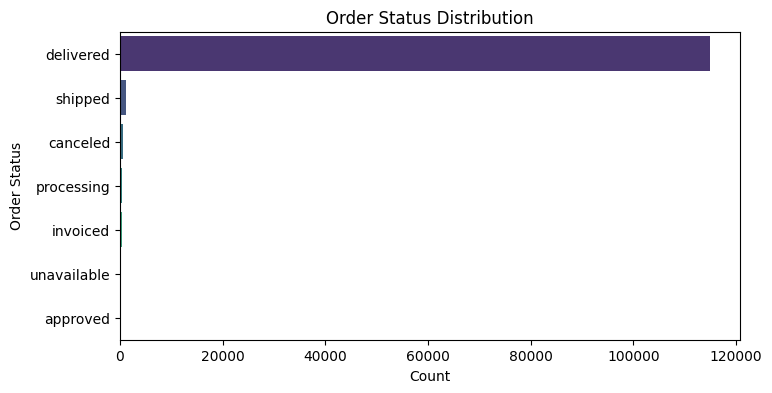

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each order status
plt.figure(figsize=(8, 4))
sns.countplot(y=rfm_data['order_status'], order=rfm_data['order_status'].value_counts().index, palette='viridis')
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.show()


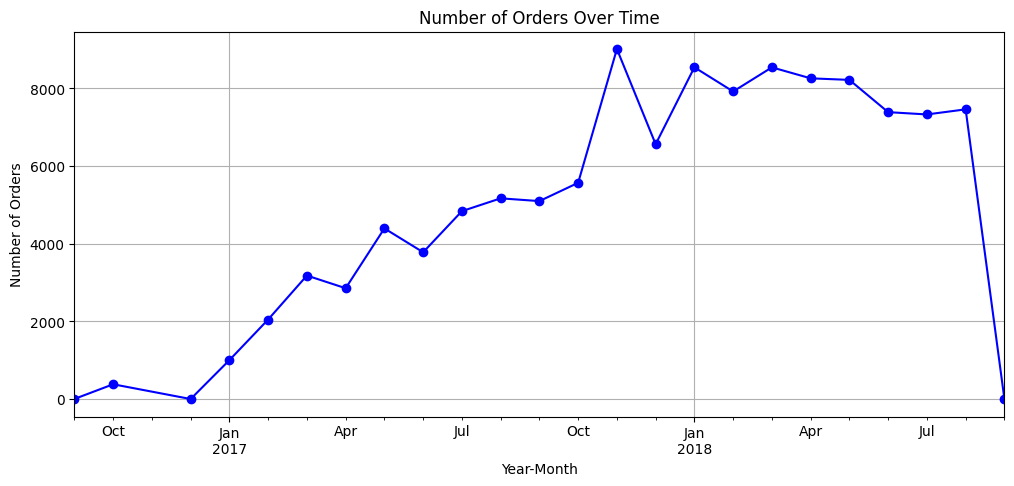

In [27]:
# Convert purchase timestamp to datetime format
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

# Extract year-month for trend analysis
rfm_data['order_month'] = rfm_data['order_purchase_timestamp'].dt.to_period('M')

# Plot purchase trends
plt.figure(figsize=(12, 5))
rfm_data['order_month'].value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.title("Number of Orders Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


In [20]:
#Explore Payment Type Preferences
#To see if a payment type is linked to higher spending:
rfm_data.groupby("payment_type")["payment_value"].mean().sort_values(ascending=False)


payment_type
credit_card    179.661264
boleto         177.560737
debit_card     149.931319
voucher         64.691270
Name: payment_value, dtype: float64

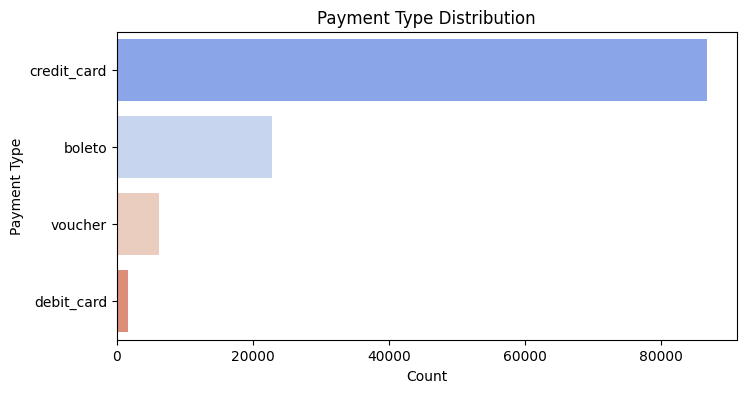

In [21]:
# Count of payment types
plt.figure(figsize=(8, 4))
sns.countplot(y=rfm_data['payment_type'], order=rfm_data['payment_type'].value_counts().index, palette='coolwarm')
plt.title("Payment Type Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Type")
plt.show()


In [22]:
#Finding Which cities have high-value transactions
#Do customers in certain states pay more on average?

rfm_data.groupby("customer_city")["payment_value"].mean().sort_values(ascending=False).head(10)

customer_city
pianco                     2324.990000
nova esperanca do piria    2252.660000
engenheiro navarro         2106.550000
mariental                  1867.850000
paranatinga                1687.186667
loreto                     1643.640000
ibitita                    1534.580000
barao ataliba nogueira     1351.510000
barra longa                1341.550000
passagem                   1265.830000
Name: payment_value, dtype: float64

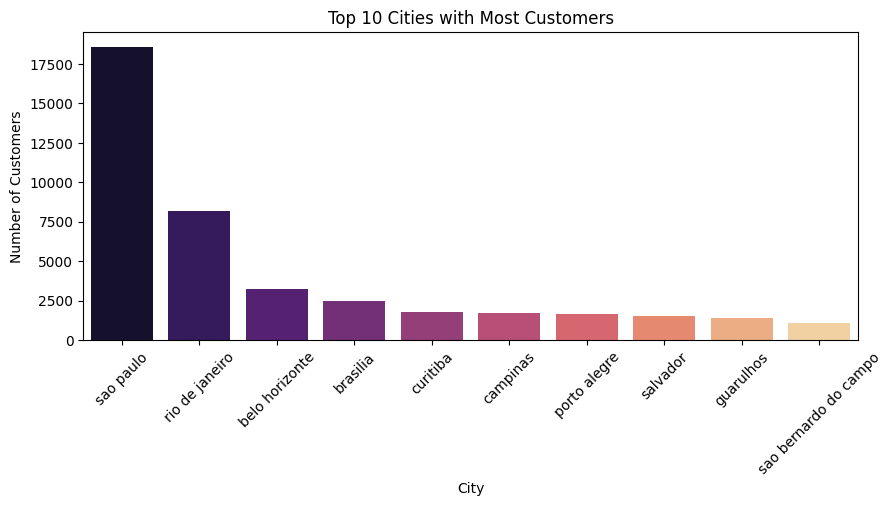

In [22]:
# Top 10 cities with most customers
top_cities = rfm_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Most Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()


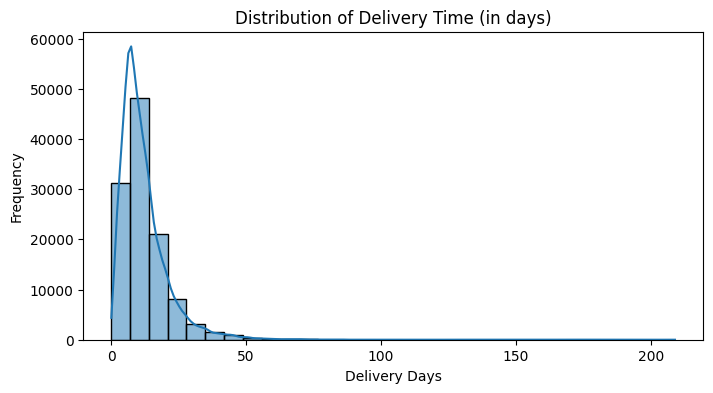

In [15]:
# Convert delivery date to datetime
rfm_data['order_delivered_customer_date'] = pd.to_datetime(rfm_data['order_delivered_customer_date'], errors='coerce')

# Calculate delivery time
rfm_data['delivery_days'] = (rfm_data['order_delivered_customer_date'] - rfm_data['order_purchase_timestamp']).dt.days

# Plot distribution of delivery time
plt.figure(figsize=(8, 4))
sns.histplot(rfm_data['delivery_days'].dropna(), bins=30, kde=True)
plt.title("Distribution of Delivery Time (in days)")
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.show()


In [25]:
# Convert delivery date to datetime
rfm_data['order_delivered_carrier_date'] = pd.to_datetime(rfm_data['order_delivered_carrier_date'], errors='coerce')
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'], errors='coerce')


In [83]:
rfm_data.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_type                             object
payment_installments                    float64
payment_value                           float64
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_month                           period[M]
delivery_days                           float64
dtype: object

In [71]:
# Ensure canceled orders have no delivery time
rfm_data.loc[rfm_data["order_status"] == "canceled", "delivery_days"] = None


In [61]:
# Group by customer city and order status
city_cancellation = rfm_data[rfm_data["order_status"] == "canceled"].groupby("customer_city")["payment_value"].mean().sort_values(ascending=False)
print(city_cancellation.head(10))  # Top 10 cities with highest average canceled payment_value


customer_city
novo hamburgo       2404.720000
paranagua           1950.200000
porto alegre        1934.124286
goiania             1689.141429
quissama            1400.740000
porto seguro        1346.410000
piratininga          898.510000
uberaba              845.088000
sao vicente          753.135000
francisco morato     739.420000
Name: payment_value, dtype: float64


In [85]:
import numpy as np
rfm_data.loc[rfm_data['order_status'] == 'canceled', 'delivery_days'] = np.nan
rfm_data.groupby('order_status')['delivery_days'].mean()


order_status
approved             NaN
canceled             NaN
delivered      12.017703
invoiced             NaN
processing           NaN
shipped              NaN
unavailable          NaN
Name: delivery_days, dtype: float64

In [86]:
#The cleaned data after EDA
rfm_data

,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,order_month,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,2018-07,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,2018-08,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,praia grande,SP,2018-02,22.0
118430,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,2017-08,24.0
118431,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2018-01,17.0
118432,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2018-01,17.0
